In [2]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt
%matplotlib inline

## Sectional method

Vector $u = \begin{bmatrix} u_0 \\ u_1 \\ \vdots \\ u_{N-1} \end{bmatrix}$ where $u_i$ are size bins with radii between $r_{min,i}$ and $r_{max,i}$

that satistfy the advection equation 

$ u_t - G u_r = 0 $

$ u_i^{k+1} = u_i^k - \frac{G \Delta t}{\Delta r} \left( u_i^k - u_{i-1}^k \right)$

with a left Neumann boundary condition $u_t = n_0$ is a nucleation rate, and a free boundary on the right. G is a linear crystal growth rate. 

Solve with Forward Euler:

C:\Users\Janine\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log


[-132.5163625   -9.9440255]


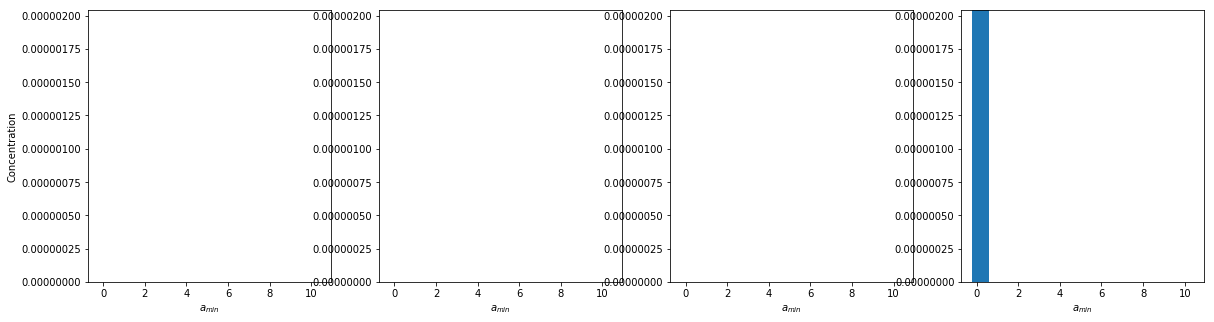

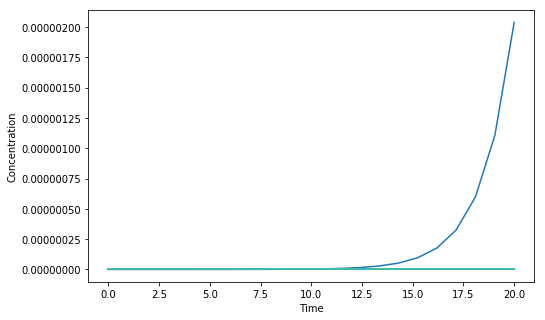

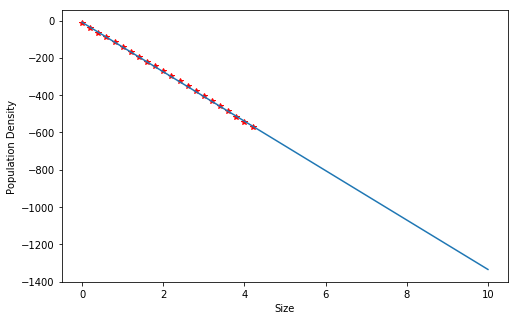

In [49]:
N = 50 # number of bins
n0 = 10**(-11)
G = 10**(-12)
tau = 1/np.log(np.max([2 - G/n0, 1]))

t0 = 0
tf = 20

r = np.linspace(0,10,N+1)
dr = r[1] - r[0]
rmin = r[:-1]
rmax = r[1:]

m = 10*np.ceil((tf-t0)*G/dr)
m = int(m+10)
t = np.linspace(t0, tf, m+2)
dt = (tf-t0)/(m+1)

u0 = n0*np.exp(-rmin/(G*tau))
                      
u = np.zeros((N,m+2))
u[:,0] = u0

diagonal = np.ones(N)
A = np.diag(diagonal - G*dt/dr) + G*dt/dr*np.diag(diagonal[:-1],-1)

for k,t_k in enumerate(t[:-1]):
    u[:,k+1] = np.matmul(A,u[:,k])
    u[0,k+1] = n0*np.exp(t_k/tau)
    
fig,ax = plt.subplots(ncols=4,figsize=(20,5))
ax[0].bar(rmax,u[:,0])
ax[0].set_ylim(0,np.max(u))
ax[0].set_xlabel('$a_{min}$')
ax[0].set_ylabel('Concentration');
ax[1].bar(rmax,u[:,1])#int(m/3)])
ax[1].set_ylim(0,np.max(u))
ax[1].set_xlabel('$a_{min}$')
ax[2].bar(rmax,u[:,2])#int(2*m/3)])
ax[2].set_ylim(0,np.max(u))
ax[2].set_xlabel('$a_{min}$')
ax[3].bar(rmax,u[:,-1])
ax[3].set_ylim(0,np.max(u))
ax[3].set_xlabel('$a_{min}$')

fig,ax1 = plt.subplots(figsize=(8,5))
ax1.plot(t,u.transpose())
ax1.set_xlabel('Time')
ax1.set_ylabel('Concentration');

fig,ax2 = plt.subplots(figsize=(8,5))
n = u[u[:,-1]>0,-1]
n_true = n0*np.exp(tf/tau-r/(G*tau))

ax2.plot(rmin[u[:,-1]>0],np.log(n),'r*')
ax2.plot(r,np.log(n_true),'k')
ax2.set_xlabel('Size')
ax2.set_ylabel('Population Density');

c = np.polyfit(rmin[u[:,-1]>0],np.log(n),1)
p = np.poly1d(c)
ax2.plot(r,p(r))
print(c)

[-0.09901314 -4.60517019]
-0.1 -4.605170185988091


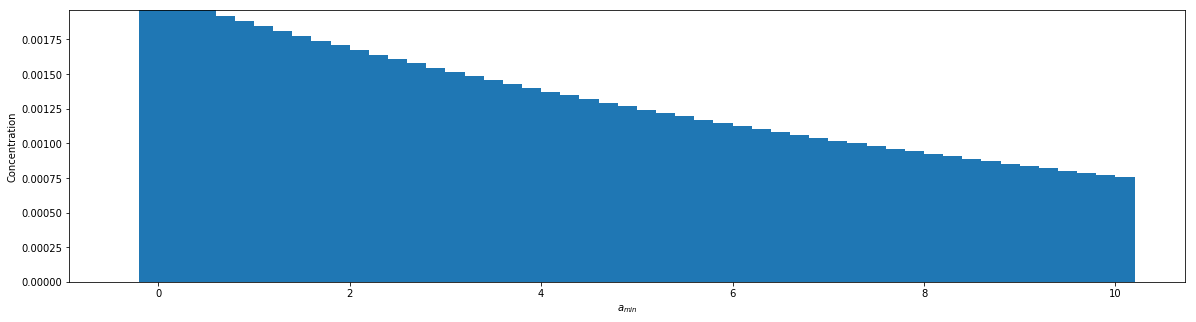

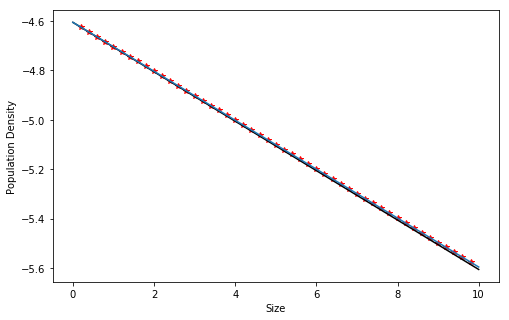

In [4]:
N = 50 # number of bins
n0 = 0.01
G = 0.1

iterate = 50

t0 = 0
tf = 100
dt = tf - t0

r = np.linspace(0,10,N+1)
dr = r[1] - r[0]
rmin = r[:-1]
rmax = r[1:]

u = np.zeros((N))

diagonal = np.ones(N)
A = np.diag(1/(1 + dr/(G*dt))*diagonal[:-1],-1)

for i in np.arange(iterate):
    u[0] = n0*dr
    u = np.matmul(A,u)

    
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(rmin,u)
ax.set_ylim(0,np.max(u))
ax.set_xlabel('$a_{min}$')
ax.set_ylabel('Concentration');

fig,ax2 = plt.subplots(figsize=(8,5))
n = u[u>0]/dr
n_true = n0*np.exp(-r/(G*dt))

ax2.plot(rmin[u>0],np.log(n),'r*')
ax2.plot(r,np.log(n_true),'k')
ax2.set_xlabel('Size')
ax2.set_ylabel('Population Density');

c = np.polyfit(rmin[u>0],np.log(n),1)
p = np.poly1d(c)
ax2.plot(r,p(r))
print(c)
print(-1/(G*tf),np.log(n0))

In [17]:
tf = 1000
m = np.ceil((tf-t0)*G/dr)
m = int(m+10)
dt = 

11